# Fashion MNIST classification problem

In [24]:
# loading pachages
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize([0.5], [0.5], inplace= True)])
# Download and load the training data
trainset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Looking at concrete iamge from loaded dataset

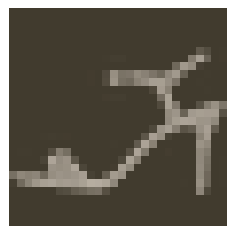

In [26]:
image, label = next(iter(trainloader))
helper.imshow(image[62,:])

In [35]:
# importing neccessary packages
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import numpy as np
import time
from collections import OrderedDict

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms

import helper

# Building the network

In [73]:
# each iamge is 28x28 so it's 784 pixels and we have 10 classes
# Hyperparameters for my network
input_size = 784
hidden_sizes = [256, 128, 64]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(OrderedDict([
                      ('fc1', nn.Linear(input_size, hidden_sizes[0])),
                      ('relu1', nn.ReLU()),
                      ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
                      ('relu2', nn.ReLU()),
                      ('fc3', nn.Linear(hidden_sizes[1], hidden_sizes[2])),
                      ('relu3', nn.ReLU()),
                      ('logits', nn.Linear(hidden_sizes[2], output_size))]))

# Next step is defining loss function
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# That's the architecture for my model with 3 hidden layers
model

Sequential(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (relu3): ReLU()
  (logits): Linear(in_features=64, out_features=10, bias=True)
)

<img src="images/NNMnist.png" >

# Training the network

In [74]:
epochs = 100
print_every = 40
steps = 0
for epoch in range(epochs):
    running_loss = 0
    for images, labels in iter(trainloader):
        steps += 1
        # Flatten MNIST images into a 784 long vector
        images.resize_(images.size()[0], 784)
        
        # Zero-out the gradient
        optimizer.zero_grad()
        
        # Forward pass
        output = model.forward(images)
        loss = criterion(output, labels)
        # Here we calculate gradients
        loss.backward()
        # Here we peform single optimization step
        optimizer.step()
        
        # Here we acumulate the loss, and divide it by print_every to get the mean loss
        running_loss += loss.item()
        if steps % print_every == 0:
            print(f"Epoch: {epoch + 1}, Loss: {running_loss/print_every}")
            running_loss = 0

Epoch: 1, Loss: 2.2945095896720886
Epoch: 1, Loss: 2.2666108906269073
Epoch: 1, Loss: 2.232533037662506
Epoch: 1, Loss: 2.1809262216091154
Epoch: 1, Loss: 2.0967565178871155
Epoch: 1, Loss: 1.946857711672783
Epoch: 1, Loss: 1.7297321528196334
Epoch: 1, Loss: 1.5057552874088287
Epoch: 1, Loss: 1.3571345329284668
Epoch: 1, Loss: 1.2422975569963455
Epoch: 1, Loss: 1.1346119672060013
Epoch: 1, Loss: 1.0567168980836867
Epoch: 1, Loss: 1.0181772902607917
Epoch: 1, Loss: 0.9320789009332657
Epoch: 1, Loss: 0.9057970270514488
Epoch: 1, Loss: 0.876152004301548
Epoch: 1, Loss: 0.8364757403731347
Epoch: 1, Loss: 0.8179676845669747
Epoch: 1, Loss: 0.7894367039203644
Epoch: 1, Loss: 0.7642134070396424
Epoch: 1, Loss: 0.7636602133512497
Epoch: 1, Loss: 0.7317147359251976
Epoch: 1, Loss: 0.725369718670845
Epoch: 2, Loss: 0.387379863858223
Epoch: 2, Loss: 0.6908073410391807
Epoch: 2, Loss: 0.6753504663705826
Epoch: 2, Loss: 0.6842517659068108
Epoch: 2, Loss: 0.672794371843338
Epoch: 2, Loss: 0.65192959

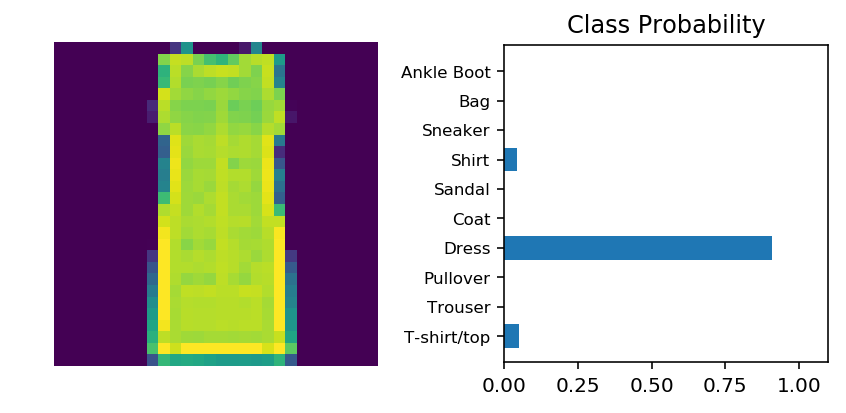

In [92]:
# Extract first batch
images, labels = next(iter(trainloader))

# extract first image and turn it ino 1 x 784 vector
img = images[53].resize_(1,784)

# turn of gradient computation and compute logits on trained model
# for that particular image
with torch.no_grad():
    logits = model.forward(img)

# Apply softmax function in order to get probabilities from logits
probabilities = F.softmax(logits, dim=1)
helper.view_classify(img.view(1,28,28), probabilities, version="Fashion")